In [79]:
#import libaraies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [80]:
data  = pd.read_csv("./DataSet/train.csv")

In [81]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [82]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
data["Sex"] = data["Sex"].map({"male": 1, "female": 0}) #male = 1, female = 0
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2}) #S = 0, C = 1, Q = 2

In [85]:
data.drop(["PassengerId","Name", "Ticket","Cabin"], axis = 1, inplace = True)

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


<Axes: >

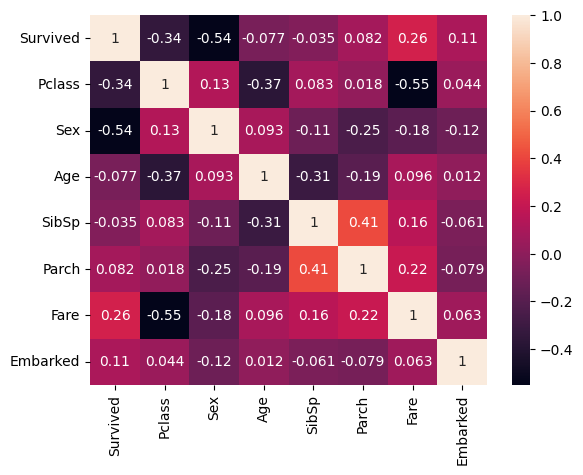

In [87]:
correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot = True)

In [88]:
## count null 
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

#### There some null values in age, we are going to use regressor model to pridict those null values

In [89]:
from sklearn.linear_model import LinearRegression

# Split the dataset into two parts: one with non-null values and one with null values
train_data = data.dropna(subset=['Age'])
predict_data = data[data['Age'].isnull()]

# Extract features and target variables for training
X_train = train_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]
y_train = train_data['Age']

# Train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Use the trained model to predict missing values
X_predict = predict_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']]
predicted_bedrooms = linear_model.predict(X_predict)

# Fill null values of no_of_bedrooms with predicted values
data.loc[data['Age'].isnull(), 'Age'] = predicted_bedrooms

### Pridicting null value for Embarked using K-NN classifier

In [90]:
## KNN model for missing values of embarked
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into two parts: one with non-null values and one with null values
train_data = data.dropna(subset=['Embarked'])
predict_data = data[data['Embarked'].isnull()]

# Extract features and target variables for training
X_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y_train = train_data['Embarked']

# Train the KNN model
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)

# Use the trained model to predict missing values
X_predict = predict_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
predicted_embarked = KNN_model.predict(X_predict)

# Fill null values of no_of_bedrooms with predicted values
data.loc[data['Embarked'].isnull(), 'Embarked'] = predicted_embarked

In [91]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<Axes: >

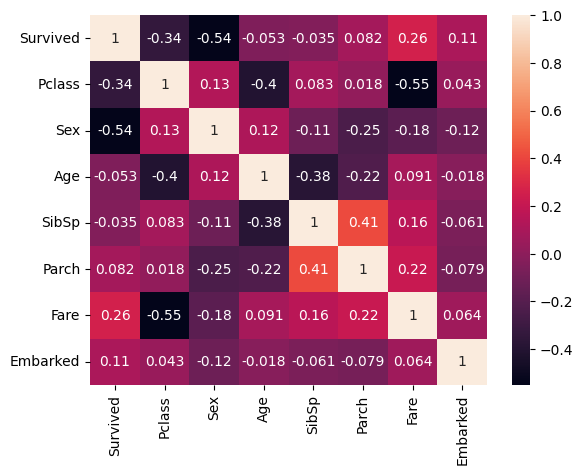

In [92]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot = True)

### Correlation with survial

Correletion heatmap shows the dependecy of different attributes with the survival chance
sex has the highest , passenger class is after that, fare fits with 26% correlated with surival

# Attempt for Pridiction on test set

##### Very less correlation of survived(y-varible) on SibSp and Parch, droping both as well

In [93]:
data.drop(["SibSp", "Parch"], axis = 1, inplace = True)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 41.9 KB


In [95]:
data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.000000,7.2500,0.0
1,1,1,0,38.000000,71.2833,1.0
2,1,3,0,26.000000,7.9250,0.0
3,1,1,0,35.000000,53.1000,0.0
4,0,3,1,35.000000,8.0500,0.0
...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,0.0
887,1,1,0,19.000000,30.0000,0.0
888,0,3,0,19.427101,23.4500,0.0
889,1,1,1,26.000000,30.0000,1.0


In [96]:
data.shape

(891, 6)

In [97]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [98]:
## feature selection
X = data.drop(["Survived"], axis = 1)
y = data["Survived"]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [136]:
X_train.shape

(712, 5)

In [103]:
test_df= pd.read_csv("./DataSet/test.csv")
passID = test_df["PassengerId"]
test_df["Sex"] = test_df["Sex"].map({"male": 1, "female": 0}) #male = 1, female = 0
test_df["Embarked"] = test_df["Embarked"].map({"S": 0, "C": 1, "Q": 2}) #S = 0, C = 1, Q = 2
test_df.drop(["Name", "Ticket", "Cabin", "PassengerId"], axis = 1, inplace = True)


In [104]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [105]:
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].mean())

In [108]:
age_null_df = test_df[test_df["Age"].isnull()]
age_null_df.drop(["Age","Embarked"], axis = 1, inplace = True)
age_null_pred = linear_model.predict(age_null_df)

test_df.loc[test_df["Age"].isnull(), "Age"] = age_null_pred



C:\Users\alisa\AppData\Local\Temp\ipykernel_12220\3432464804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_null_df.drop(["Age","Embarked"], axis = 1, inplace = True)


In [109]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [137]:
test_df.drop(["SibSp", "Parch"], axis = 1, inplace = True)

In [138]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 75)
rfc.fit(X_train, y_train)



RandomForestClassifier(n_estimators=75)

In [139]:
# prediction
y_pred = rfc.predict(X_test)

In [140]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.8044692737430168
[[86 19]
 [16 58]]


In [141]:
test_df.shape

(418, 5)

In [142]:
X_test.shape

(179, 5)

In [108]:
predictions = rfc.predict(test_df)

In [109]:

submission = pd.DataFrame({"PassengerId": passID, "Survived": predictions})

submission.to_csv("submission_RandomForest.csv", index = False)

In [145]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7988826815642458
[[89 16]
 [20 54]]


In [147]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.6536312849162011
[[99  6]
 [56 18]]


In [149]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7094972067039106
[[88 17]
 [35 39]]


In [151]:
# Naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7653631284916201
[[84 21]
 [21 53]]


In [158]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7597765363128491
[[85 20]
 [23 51]]


In [127]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [128]:
predictions = mlp.predict(test_df)

submission = pd.DataFrame({"PassengerId": passID, "Survived": predictions})

submission.to_csv("submission_MLP.csv", index = False)

In [32]:
## Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7865168539325843
[[86 23]
 [15 54]]


In [33]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
final_y = y_pred

0.8314606741573034
[[93 16]
 [14 55]]


In [34]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(test_df)
final_y = y_pred

In [35]:
final_y = np.array(final_y)

In [36]:
df_predict = pd.DataFrame({"PassengerId": passID, "Survived": final_y})

In [37]:
# convert to csv
df_predict.to_csv("submission.csv", index = False)